### Estatística descritiva
  
Distribuições discretas:  https://en.wikipedia.org/wiki/List_of_probability_distributions
  - Uniform
  - Binomial
  - Multinomial
  - Poisson
  - Geométrica
  - Hipergeométrica
  - Binomial negativa
  
Distribuições contínuas: https://en.wikipedia.org/wiki/Probability_distribution#Continuous_probability_distribution
  - Uniform
  - Normal (gaussian)
  - Gamma (Exponential)
  - Beta
  - Logistic

and others

In [2]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

### Uniform discrete distribution

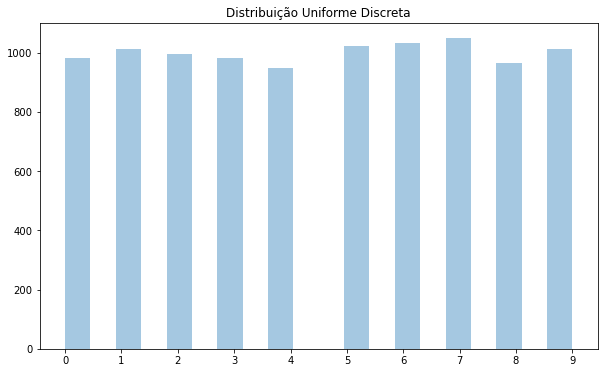

In [9]:
N = 10000
limSup = 10
nums = np.random.randint(0, limSup, N)

fig = plt.figure(figsize=(10,6))
ax = sns.distplot(nums, hist=True, kde=False)
ax.set_title("Distribuição Uniforme Discreta")
ax.set_xticks(np.arange(0, limSup));

## Distribuição binomial
  - binomial: sim / não, cara / coroa, mutou / não mutou

![binomial distribution](../figure/binomial_distribution.jpg)

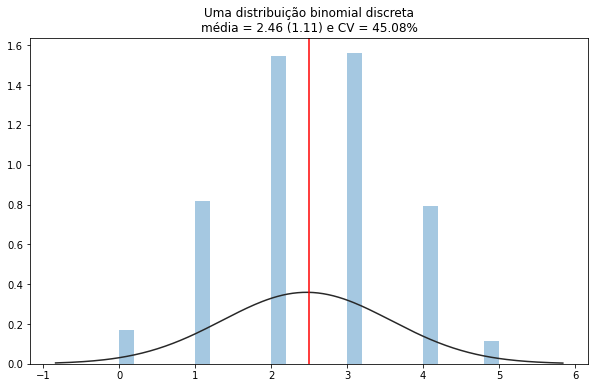

In [10]:
from scipy.stats import norm

n = 5    # moedas
p = 0.5  # dado não viciado p(cara) = p(coroa) = .5
N = 1000
jogo = np.random.binomial(n, p, N)

muj  = np.mean(jogo)
ssdj = np.std(jogo)
vc = ssdj/muj

fig = plt.figure(figsize=(10,6))
ax = sns.distplot(jogo, hist=True, kde=False, fit=norm)
ax.axvline(n/2, color='red')
ax.set_title("Uma distribuição binomial discreta\nmédia = %.2f (%.2f) e CV = %.2f%%"%(muj, ssdj, vc*100));

## Distribuição multinomial
  - multinomial: p(cor dos olhos), trânsito: vazio, livre, médio, congestionado, parado

![binomial distribution](../figure/multinomial_distribution.jpg)

In [17]:
from scipy.stats import multinomial

In [31]:
pVazio = 0.01
pPouco = 0.10
pMedio = 0.4
pConge = 0.44
pParad = 0.05

pVazio + pPouco + pMedio + pConge + pParad

1.0

In [32]:
## numero de dias verificados pela Cia de Transito
n = 10

In [33]:
rv = multinomial(n, [pVazio, pPouco, pMedio, pConge, pParad])

In [34]:
# qual a probabilidade e 5 dias vazios e 5 dias Baixo
rv.pmf([5, 5, 0, 0, 0])

2.5200000000000054e-13

In [37]:
# qual a probabilidade e 0 dias vazios, 1 dia Baixo, 4 dias Medio, 5 dia Congestionados, 0 dia parado
rv.pmf([0, 1, 4, 5, 0])

0.053195377213440004

In [38]:
# qual a probabilidade e 0 dias vazios, 1 dia Baixo, 4 dias Medio, 4 dia Congestionados, 1 dia parado
rv.pmf([0, 1, 4, 4, 1])

0.030224646144000108

### De quantas forma posso colocar 5 tipos de transito em 10 dias
  - 5^10 = 9765625

### Neste caso a forma mais dificil é 10 dias com transito vazio:
   - 0.01 ** 10 ~  10^-20 (impossível, muito raro)

### Já a combinação de transito médio (0.4) e congestionado (.44) é muito provável
### Permutação 10 | 2 = 10 * 9 = 90 formas 

In [66]:
count = 0
for i in range(0, 10):
    count += 1
    j = 10-i
    
    comb = combinations([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], j)
    ncomb = len(list(comb))

    print(count, ")", ncomb, " combinações", i, j, rv.pmf([0, 0, i, j, 0]) )

1 ) 1  combinações 0 10 0.0002719736093841819
2 ) 10  combinações 1 9 0.002472487358038018
3 ) 45  combinações 2 8 0.010114721010155526
4 ) 120  combinações 3 7 0.024520535782195214
5 ) 210  combinações 4 6 0.03900994328985606
6 ) 252  combinações 5 5 0.04255630177075204
7 ) 210  combinações 6 4 0.032239622553599995
8 ) 120  combinações 7 3 0.016747855872000016
9 ) 45  combinações 8 2 0.005709496320000016
10 ) 10  combinações 9 1 0.0011534336000000017


In [65]:
from itertools import combinations 

comb = combinations([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 3)
print( len(list(comb)))

120


### De quantas formas posso colocar 3 ovos coloridos em 2 buracos
3 > 2

### Quando a ordem não importa (1,2) == (2,1) usa-se combinação

In [41]:
from itertools import combinations 

for comb in combinations([1,2,3], 2):
    print(comb)

(1, 2)
(1, 3)
(2, 3)


### Quando a ordem importa (1,2) != (2,1) usa-se permutação

In [50]:
from itertools import permutations 

perm = permutations([1, 2, 3], 2)

for i in perm: 
    print(i)


(1, 2)
(1, 3)
(2, 1)
(2, 3)
(3, 1)
(3, 2)


### de quantas formas de transito (5) posso colocar em 10 dias: combinação de 10, 5 a 5 = (10 | 5)
5 < 10  

10 dias livres ... nada  
 9 dias livres ... 1 em cada outro  
 8 dias livres ....2 em cada outro  
               ....1 + 1 em cada outro  
               
### Problema dos elevadores

  - tenho várias entradas
  - entro várias vezes
  
### Exemplo: 3 elevadores (do térreo até 10o andar), no 10o andar tenho 2 elevadores
### De quantas formas chego no 15o andar?

3 * 2 = 6

### vamos pensar somente em dois tipos de transito, M, C (medio e congestionado)
### vamos pensar em 3 dias possíveis

### Problema do DNA
  - 4 nucleotideos
  - sequências de 5
  - quantas formas?
    - 4**5
    
    
### Problema do formas x dias
  - 2 formas
  - 3 dias
  - quantas formas?
    - 2**3 = 2 * 2 * 2 (duas possíveis formas em cada dia)
    
    
de quantas formas posso colocar M e C em 3 buracos

MMM  
MMC  

MCM  
MCC  
 
CMM  
CMC  

CCM  
CCC  

### 2 formas em cada 3 dias
2 * 2 * 2  

2^3

### 2 formas em 4 dias


MMMM  
MMMC  

MMCM  
MMCC  

MCMM  
MCMC  

MCCM  
MCCC  

CMMM  
CMMC  

CMCM  
CMCC  

CCMM  
CCMC  

CCCM  
CCCC  

2 * 2 * 2 * 2 = 16
2^4 (dias)

### 5 formas x 10 dias
### similar a 4 nucleotídeos numa sequência de 10 pb
  
5^10 uauuuu